Columns in dataset: ['Category', 'Message']
Sample data:
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Label distribution:
 label
0    4825
1     747
Name: count, dtype: int64

Model Accuracy: 96.95%


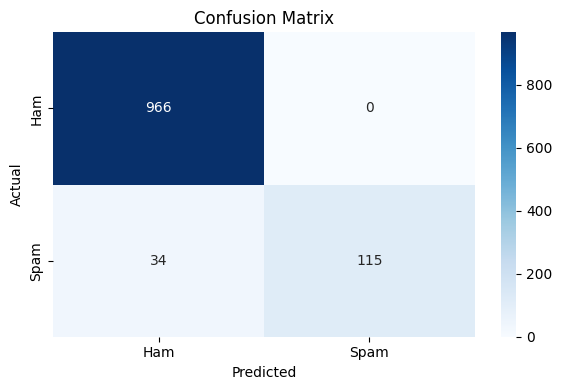

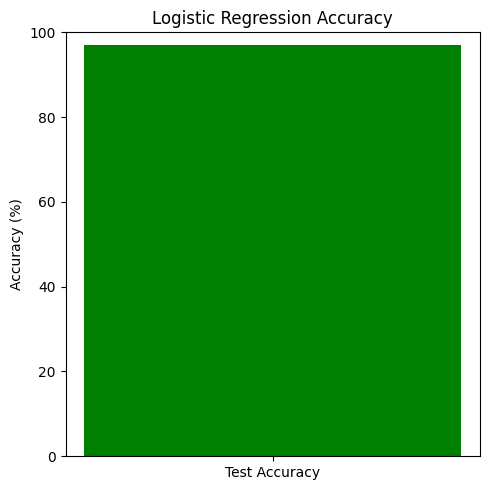

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv('email.csv', encoding='latin-1')

# Show column names to confirm structure
print("Columns in dataset:", df.columns.tolist())

# Select only the necessary columns
if 'Category' in df.columns and 'Message' in df.columns:
    df = df[['Category', 'Message']]
    df.columns = ['label', 'text']
else:
    raise ValueError("Expected columns 'Category' and 'Message' not found in the dataset.")

# Show sample data
print("Sample data:")
print(df.head())

# Drop rows with missing labels or text
df.dropna(subset=['label', 'text'], inplace=True)

# Keep only 'ham' and 'spam' labels
df = df[df['label'].isin(['ham', 'spam'])]

# Convert text column to string type
df['text'] = df['text'].astype(str)

# Encode labels: ham → 0, spam → 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Print label distribution
print("Label distribution:\n", df['label'].value_counts())

# Split data
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train.astype(str))
X_test_tfidf = vectorizer.transform(X_test.astype(str))

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Accuracy Visualization
plt.figure(figsize=(5, 5))
plt.bar(['Test Accuracy'], [accuracy * 100], color='green')
plt.title('Logistic Regression Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


Dataset preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

DataFrame after dropping 'age' and 'sex' columns:


,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,125,212,0,1,168,0,1.0,2,2,3,0
1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,0,145,174,0,1,125,1,2.6,0,0,3,0
3,0,148,203,0,1,161,0,0.0,2,1,3,0
4,0,138,294,1,1,106,0,1.9,1,3,2,0



Model Accuracy: 81.95%


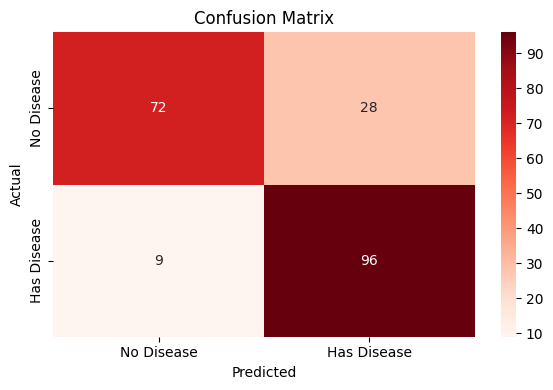

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv('heart.csv')  # Make sure this file is in your working directory

# Show the first few rows
print("Dataset preview:")
print(df.head())


# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Split data into features and target, dropping 'age' and 'sex' from features
X = df.drop(['target', 'age', 'sex'], axis=1)
y = df['target']

# Drop 'age' and 'sex' columns from the DataFrame
df = df.drop(['age', 'sex'], axis=1)

# Display the head of the DataFrame after dropping columns
print("\nDataFrame after dropping 'age' and 'sex' columns:")
display(df.head())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Disease', 'Has Disease'],
            yticklabels=['No Disease', 'Has Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

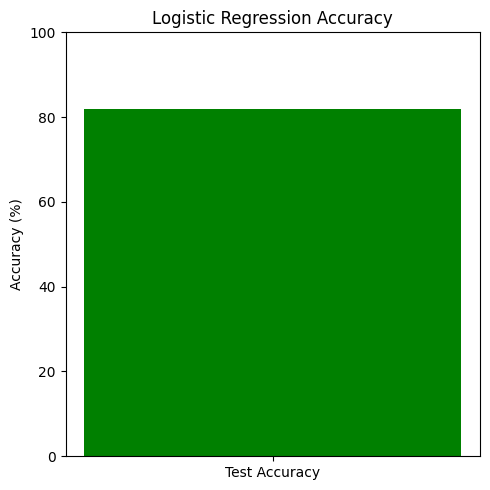

In [ ]:
plt.figure(figsize=(5, 5))
plt.bar(['Test Accuracy'], [accuracy * 100], color='green')
plt.title('Logistic Regression Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()